In [ ]:
pip install nltk

In [ ]:
import nltk
#nltk.download()

In [ ]:
# División de una oración en palabras individuales.

# Importar las bibliotecas necesarias
import nltk
from nltk.tokenize import word_tokenize

# Descargar los datos necesarios para la tokenización
nltk.download('punkt')

# División de una oración en palabras individuales
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural en Python"
tokens = word_tokenize(sentence)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['NLTK', 'es', 'una', 'biblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural', 'en', 'Python']


In [ ]:
# Hacer a mano la función word_tokenize con un ciclo for

def manual_word_tokenize_with_loop(text):
    tokens = []  # Lista para almacenar los tokens finales
    current_token = []  # Lista para acumular caracteres alfanuméricos que forman un token

    for char in text:
        if char.isalnum():
            # Si el carácter es alfanumérico (letra o dígito), añadirlo al token actual
            current_token.append(char)
        else:
            if current_token:
                # Si el token actual no está vacío, unir los caracteres y añadir el token a la lista de tokens
                tokens.append(''.join(current_token))
                current_token = []  # Vaciar el token actual
            if char.strip():  # Si el carácter no es un espacio, añadirlo como un token separado
                tokens.append(char)

    if current_token:
        # Añadir cualquier token restante que no se haya añadido aún
        tokens.append(''.join(current_token))

    return tokens

# Ejemplos
text = "NLTK es una biblioteca de procesamiento de lenguaje natural en Python"
tokens = manual_word_tokenize_with_loop(text)
print(tokens)

text = "Observación: División de una oración en palabras individuales. "
tokens = manual_word_tokenize_with_loop(text)
print(tokens)

['NLTK', 'es', 'una', 'biblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural', 'en', 'Python']
['Observación', ':', 'División', 'de', 'una', 'oración', 'en', 'palabras', 'individuales', '.']


In [ ]:
#Reducción de palabras a su forma base con NLTK
from nltk.stem import PorterStemmer

#words = ['trabanjando', 'trabajos', 'trabajador']
words = ['running', 'plays', 'jumped']
stemmer = PorterStemmer()
stem = [stemmer.stem(word) for word in words]
print(stem)

['run', 'play', 'jump']


In [ ]:
#Etiquetado gramatical de palabras en una oración.

# Importar las bibliotecas necesarias
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Descargar los datos necesarios para el etiquetado gramatical
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Etiquetado gramatical de palabras en una oración
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural en Python"
tokens = word_tokenize(sentence)
tagged_words = pos_tag(tokens)
print(tagged_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('de', 'IN'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ'), ('en', 'FW'), ('Python', 'NN')]


In [ ]:
#Ejemplo básico de clasificador de textos utilizando el clasificador
#Naive Bayes de NLTK

# 1. Importación de bibliotecas
import nltk
import random
from nltk.corpus import movie_reviews
# Descargar el recurso 'punkt'
nltk.download('punkt')
import matplotlib.pyplot as plt


# 2. Definición del cojunto de datos etiquetados

#Ejemplo de conjunto de datos de textos etiquetados
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great" , "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking" , "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative")
]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


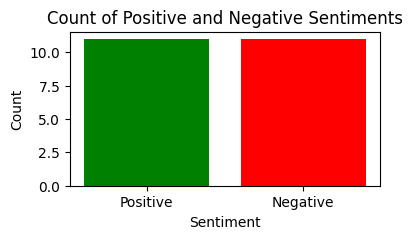

In [ ]:
# Contar la cantidad de comentarios positivos y negativos

positive_count = sum(1 for _, label in data if label == "positive")
negative_count = sum(1 for _, label in data if label == "negative")

# Crear la gráfica
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.figure(figsize=(4, 2))  # Ancho 6 pulgadas, Alto 4 pulgadas
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Sentiments')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


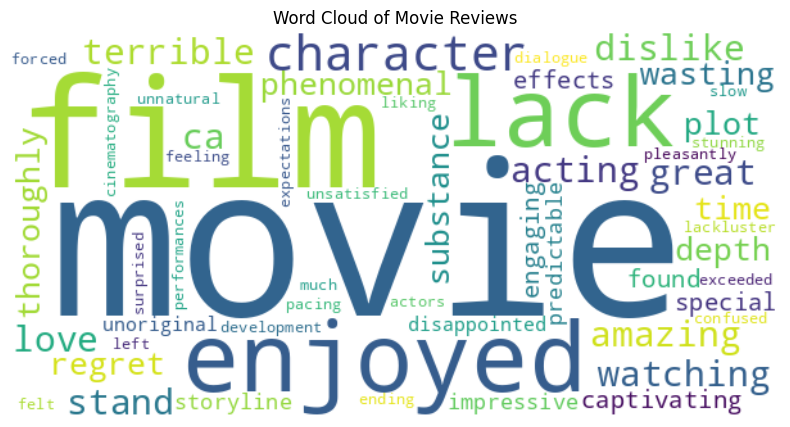

In [ ]:
# Muertra la nube de palabras

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(all_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


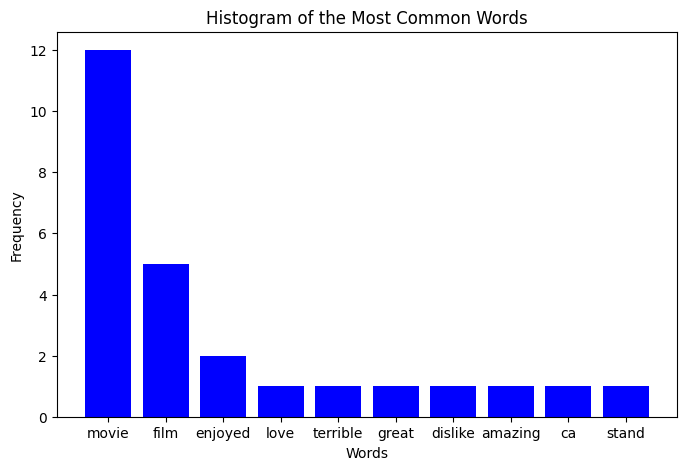

In [ ]:
# Muestra el histograma de las palabras

import matplotlib.pyplot as plt
from collections import Counter

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
common_words = word_freq.most_common(10)

# Crear listas de palabras y sus frecuencias
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# Generar el histograma
plt.figure(figsize=(8, 5))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of the Most Common Words')
plt.show()

In [ ]:
# 3. Preprocesamiento de datos

#Preprocesamiento de datos: tokenización y extracción de características
def preprocess_data(text):
    preprocessed_data = []
    tokens = nltk.word_tokenize(text)
    return {word: True for word in tokens}

In [ ]:
# 4. Aplicación de preprocesamiento a los datos

# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess_data(text), label) for (text, label) in data]

In [ ]:
# 5. División de datos

#Dividimos los datos en conjunto de entrenamiento y prueba
train_set, test_set = featuresets[:16], featuresets[16:]

In [ ]:
# 6. Entrenamiento del clasificador

#Entrenamos un clasificador utilizando Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# 7. Evaluación del clasificador

#Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


<Figure size 400x200 with 0 Axes>

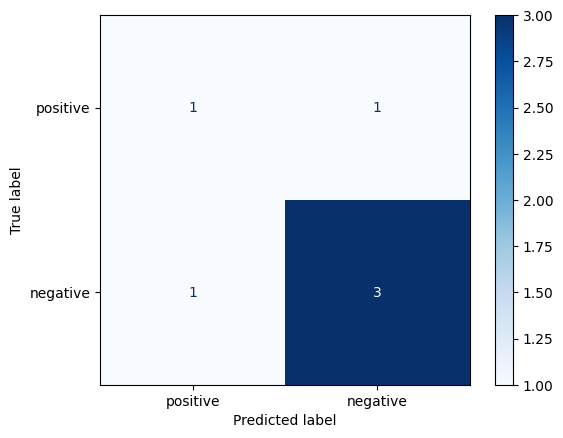

In [ ]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener etiquetas verdaderas y predichas para la matriz de confusión
true_labels = [label for (features, label) in test_set]
predicted_labels = [classifier.classify(features) for (features, label) in test_set]

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "negative"])

# Dibujar la matriz de confusión
plt.figure(figsize=(4, 2))  # Ajusta el tamaño del gráfico aquí
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# 8. Clasificación de un nuevo texto
#Clasificamos un nuevo texto
new_text = "This movie is amazing"
new_text_features = preprocess_data(new_text)
predicted_label = classifier.classify(new_text_features)
print("Predicted_label:", predicted_label)

Predicted_label: positive


#Preguntas de comprensión:

1.	¿Qué tarea realiza el código proporcionado?
    
    Rta. El código proporcionado clasifica un nuevo texto (new_text), entre positivo y negativo, utilizando un clasificador previamente entrenado.


2.	¿Cuál es el propósito del preprocesamiento de datos en este contexto?
    
    Rta.El propósito del preprocesamiento de datos es transformar el texto bruto en una forma que pueda ser interpretada por el modelo de aprendizaje automático.


3.	¿Qué función de NLTK se utiliza para tokenizar el texto?
    
    Rta.La función de NLTK utilizada para tokenizar el texto es nltk.word_tokenize. Esta función divide el texto en palabras individuales o tokens.


4.	¿Cuál es el propósito de dividir los datos en conjuntos de entrenamiento y prueba?

    Rta. El propósito de dividir los datos en conjuntos de entrenamiento y prueba es evaluar el rendimiento del modelo de clasificación. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se utiliza para evaluar la precisión y generalización del modelo sobre datos no vistos.


5.	¿Qué algoritmo de clasificación se utiliza en este código?
    
    Rta. El algoritmo de clasificación utilizado es Naive Bayes (nltk.NaiveBayesClassifier).


6.	¿Cómo se evalúa la precisión del clasificador?
    
    Rta.La precisión del clasificador se evalúa utilizando el conjunto de prueba. Se calcula la proporción de predicciones correctas entre todas las predicciones realizadas en el conjunto de prueba. Esto se hace utilizando nltk.classify.accuracy.


7.	¿Qué se entiende por "Accuracy" en el contexto de evaluación del clasificador?
    
    Rta. "Accuracy" (precisión) en el contexto de evaluación del clasificador se refiere a la proporción de predicciones correctas realizadas por el clasificador sobre el conjunto de prueba. Es una métrica común para evaluar el rendimiento de un clasificador.


8.	¿Cuál es el resultado de la clasificación del nuevo texto "This movie is amazing"?

    Rta. El resultado de la clasificación del nuevo texto "This movie is amazing" es la etiqueta predicha por el clasificador para este texto (Predicted_label: positive).


Resumen

El código clasifica un nuevo texto utilizando un clasificador entrenado, después de preprocesar el texto. La tokenización se realiza con nltk.word_tokenize. El preprocesamiento es esencial para transformar el texto en una representación adecuada para el clasificador. La división de datos en conjuntos de entrenamiento y prueba permite evaluar el rendimiento del clasificador. La precisión se calcula como la proporción de predicciones correctas en el conjunto de prueba. La etiqueta predicha para "This movie is amazing" es: positive.


# Ejercicio de exploración

In [ ]:
#Ejemplo básico de clasificador de textos utilizando el clasificador
#Naive Bayes de NLTK

# 1. Importación de bibliotecas
import nltk
import random
from nltk.corpus import movie_reviews
# Descargar el recurso 'punkt'
nltk.download('punkt')
import matplotlib.pyplot as plt


# 2. Definición del cojunto de datos etiquetados

#Ejemplo de conjunto de datos de textos etiquetados
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great" , "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking" , "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative"),
    #Adicionales negativas
    ("a weak and ineffective ghost story without a conclusion or pay off", "negative"),
    ("without a conclusion or pay off", "negative"),
    ("thriller as lazy as it is interminable", "negative"),
    ("is the first film I 've ever seen that had no obvious directing involved", "negative"),
    ("There's nothing interesting in Unfaithful whatsoever", "negative"),
    ("There's already been too many of these film", "negative"),
    ("feels stitched together from stock situations and characters from other movies", "negative"),
    ("It shows that some studios firmly believe that people have lost the ability to think and will forgive any shoddy product as long as there's a little girl-on-girl action", "negative"),
    ("shoddy product", "negative"),
    ("yet not as hilariously raunchy as South Park , this strangely schizo cartoon seems suited neither to kids or adults", "negative"),
    #Adicionales positivas
    ("as hilariously raunchy as South Park", "positive"),
    ("this will be an enjoyable choice for younger kids", "positive"),
    ("is surprisingly brilliant", "positive"),
    ("Toback 's deranged immediacy makes it seem fresh again", "positive"),
    ("Stanley Kwan has directed not only one of the best gay love stories ever made", "positive"),
    ("Thanks to confident filmmaking and a pair of fascinating performances", "positive"),
    ("with a series of riveting set pieces", "positive"),
    ("A mesmerizing cinematic poem from the first frame to the last", "positive"),
    ("which is worth seeing", "positive"),
    ("enough freshness", "positive")
]
